# Installing dependencies

In [4]:
! pip install livelossplot

In [0]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Code to keep colab running
#function ConnectButton(){
#    console.log("Connect pushed"); 
#    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
#}
#setInterval(ConnectButton,60000);

# Preparation

## Prepare Covid-Net dataset

In [0]:
!unzip -qq drive/My\ Drive/data.zip
!unzip -qq drive/My\ Drive/data_balanced.zip

## Importing data unbalanced

In [11]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

np.random.seed(7)

train_data = pd.read_csv('drive/My Drive/train_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
print(train_data.head())


test_data = pd.read_csv('drive/My Drive/test_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
test_data.head(1)

image_height = 224 #150
image_width = 224 #150

  id                                              image     result type1 type2
0  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  pneumonia    PA   NaN
1  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....  pneumonia    PA   NaN
2  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...  pneumonia    PA   NaN
3  7  SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...  pneumonia    PA   NaN
4  7  SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...  pneumonia    PA   NaN


In [0]:
print(train_data['result'].unique())
train_data[train_data['result'] == 'COVID-19'].count()

In [0]:
print(test_data['result'].unique())
test_data[test_data['result'] == 'COVID-19'].count()

In [12]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32 #10

train_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2
)

test_generator = ImageDataGenerator(
    rescale=1/255
)

train_set = train_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    directory="data/train/",
    y_col='result',
    shuffle=True,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

test_set = test_generator.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="data/test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

Found 13640 validated image filenames belonging to 3 classes.
Found 1510 validated image filenames belonging to 3 classes.


### Analysing Data

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

import cv2

f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'normal']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  print(im.shape)
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões Normais')
plt.show()

In [0]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'pneumonia']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com Pneumonia')
plt.show()

In [0]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'COVID-19']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com COVID-19')
plt.show()

In [0]:
sns.set_style('whitegrid')
plt.figure()
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid','Teste-Normal','Teste-Pneumonia','Teste-Covid'],
                    y=[train_data[train_data['result'] == 'normal'].shape[0],
                       train_data[train_data['result'] == 'pneumonia'].shape[0],
                       train_data[train_data['result'] == 'COVID-19'].shape[0],
                       test_data[test_data['result'] == 'normal'].shape[0],
                       test_data[test_data['result'] == 'pneumonia'].shape[0],
                       test_data[test_data['result'] == 'COVID-19'].shape[0]
                    ]) 
grafico.set_title('Data Set')
plt.show()

## Importing data balanced

In [13]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

np.random.seed(7)

train_data_balanced = pd.read_csv('drive/My Drive/train_split_v3_augmented.csv', sep=',', index_col=0)
print(train_data.head())


test_data_balanced = pd.read_csv('drive/My Drive/test_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
test_data.head(1)

image_height = 224 #150
image_width = 224 #150

  id                                              image     result type1 type2
0  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  pneumonia    PA   NaN
1  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....  pneumonia    PA   NaN
2  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...  pneumonia    PA   NaN
3  7  SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...  pneumonia    PA   NaN
4  7  SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...  pneumonia    PA   NaN


In [0]:
print(train_data_balanced['result'].unique())
train_data_balanced[train_data_balanced['result'] == 'COVID-19'].count()

In [0]:
print(test_data_balanced['result'].unique())
test_data_balanced[test_data_balanced['result'] == 'COVID-19'].count()

In [14]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32 #10

train_generator_balanced = ImageDataGenerator(
    rescale=1/255
)

test_generator_balanced = ImageDataGenerator(
    rescale=1/255
)

train_set_balanced = train_generator_balanced.flow_from_dataframe(
    dataframe=train_data_balanced,
    x_col='image',
    directory="train/",
    y_col='result',
    shuffle=True,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

test_set_balanced = test_generator_balanced.flow_from_dataframe(
    dataframe=test_data_balanced,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

Found 4961 validated image filenames belonging to 3 classes.
Found 1510 validated image filenames belonging to 3 classes.


### Analysing Data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


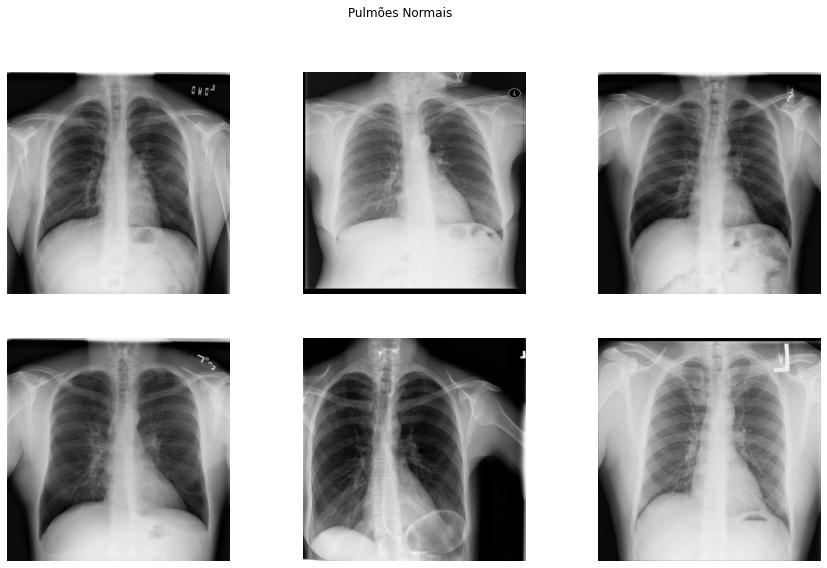

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

import cv2

f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'normal']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  print(im.shape)
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões Normais')
plt.show()

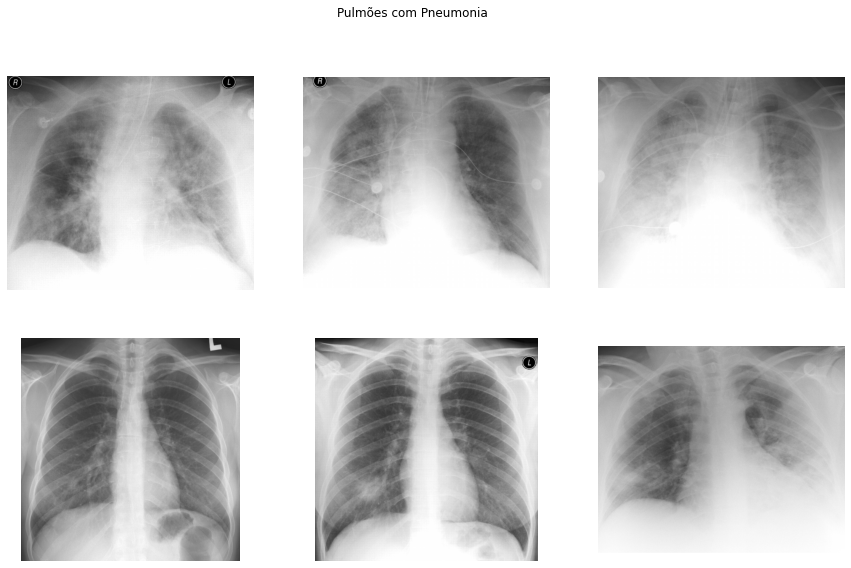

In [0]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'pneumonia']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com Pneumonia')
plt.show()

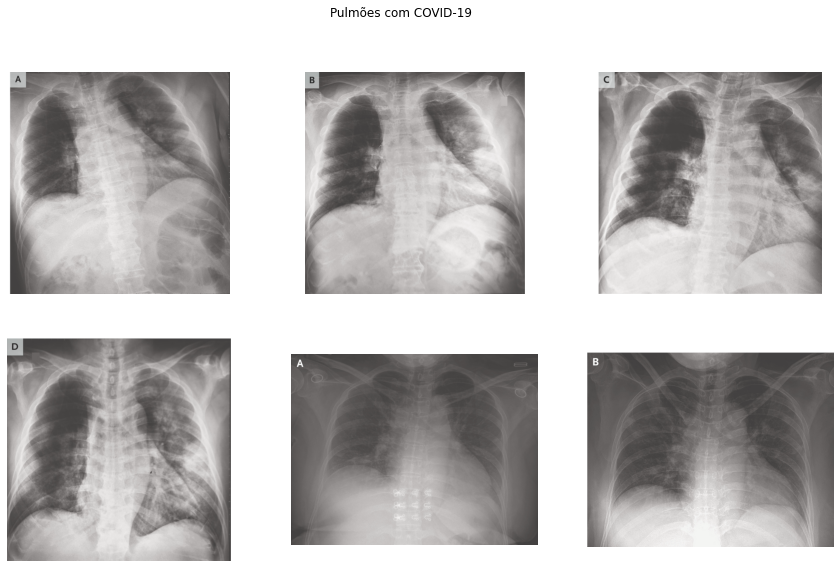

In [0]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'COVID-19']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com COVID-19')
plt.show()

<Figure size 432x288 with 0 Axes>

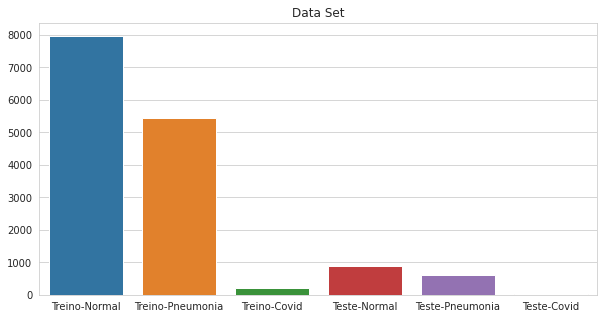

In [0]:
sns.set_style('whitegrid')
plt.figure()
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid','Teste-Normal','Teste-Pneumonia','Teste-Covid'],
                    y=[train_data_balanced[train_data_balanced['result'] == 'normal'].shape[0],
                       train_data_balanced[train_data_balanced['result'] == 'pneumonia'].shape[0],
                       train_data_balanced[train_data_balanced['result'] == 'COVID-19'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'normal'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'pneumonia'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'COVID-19'].shape[0]
                    ]) 
grafico.set_title('Data Set')
plt.show()

# Developing model

## Auxiliary Functions

In [0]:
import os

def save_model_on_cloud(model,name,ind):
  path="/content/drive/My Drive/covid_runs/run"+ind
  os.makedirs(path)
  model.save_weights(path + "/last_run" + name + ".hdf5")
  json_model = model.to_json()
  with open(path + "/" + name + ".json", "w") as json_file:
    json_file.write(model_json)
  os.rename("best_weights_" + name + ".hdf5", path + "/best_weights_" + name + ".hdf5")

In [0]:
from keras.models import model_from_json
import json

def load_model_from_cloud(model_path, weights_path):
  with open(model_path, 'r') as json_file:
    architecture  = json.load(json_file)
    model = model_from_json(json.dumps(architecture))
  model.load_weights(weights_path)
  return model

In [0]:
import cv2
def query_model(model, img):
  tmp_image = cv2.imread(img)
  tmp_image = np.array(tmp_image)
  tmp_image = cv2.resize(tmp_image, (image_width, image_height))
  tmp_image = tmp_image / 255
  res = model.predict(np.expand_dims(tmp_image, axis=0))
  print(test_set.class_indices)
  ind = np.argmax(res)
  print(ind)
  print([t * 100 for t in res])

## Importing pre-trained model -> VGG16 ! DONE


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import keras
from keras.models import Model
from keras.optimizers import Adam

vgg = keras.applications.VGG16(weights='imagenet',include_top=False, input_shape = (image_width, image_height, 3))

new_model = vgg.output
new_model = Flatten()(new_model)
new_model = Dense(512, activation="relu")(new_model)
new_model = Dropout(0.5)(new_model)
new_model = Dense(256, activation="relu")(new_model)
new_model = Dense(3, activation="softmax")(new_model)

final_Model = Model(inputs=vgg.input, outputs=new_model, name="VGG16_Dual_Dense_Layer")

for layer in final_Model.layers[:18]:
    layer.trainable = False

opt = Adam(learning_rate=0.001)
final_Model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


final_Model.summary()
json_model = final_Model.to_json()
with open("tmp.json", "w") as json_file:
  json_file.write(json_model)

Model: "VGG16_Dual_Dense_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 55 #10
path="/content/drive/My Drive/covid_runs/run1/"

os.makedirs(path)
json_model = final_Model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]


history = final_Model.fit_generator(
    train_set,
    epochs = no_of_epochs,
    validation_data=test_set,
    callbacks=callbacks
)

final_Model.save_weights(path + "last_run.hdf5")
final_Model.save(path + "model")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [35]:
model_cloud = load_model_from_cloud("/content/drive/My Drive/covid_runs/run1/model.json", "/content/drive/My Drive/covid_runs/run1/best_weights_vgg16.hdf5")
model_cloud.summary()

Model: "VGG_16_Dual_Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128) 

In [36]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="data/test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [0]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [38]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
print(np.round(cm,decimals=2))
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

[[0.   0.26 0.74]
 [0.   0.91 0.09]
 [0.   0.09 0.91]]
              precision    recall  f1-score   support

    Covid-19       0.00      0.00      0.00        31
      Normal       0.93      0.91      0.92       885
   Pneumonia       0.84      0.91      0.87       594

    accuracy                           0.89      1510
   macro avg       0.59      0.61      0.60      1510
weighted avg       0.87      0.89      0.88      1510



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Ground truth')

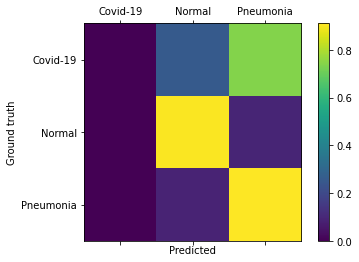

In [39]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

In [0]:
from keras.utils import plot_model
plot_model(model_cloud, to_file="tmp.png", show_shapes=True, show_layer_names=True)

## Importing pre-trained model -> VGG16 with Balaced DataSet ! DONE


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import keras
from keras.models import Model
from keras.optimizers import Adam

vgg = keras.applications.VGG16(weights='imagenet',include_top=False, input_shape = (224, 224, 3))

new_model = vgg.output
new_model = Flatten()(new_model)
new_model = Dense(512, activation="relu")(new_model)
new_model = Dense(3, activation="softmax")(new_model)

final_Model = Model(inputs=vgg.input, outputs=new_model, name="VGG16_2_Dense_Layer_Balanced")

for layer in final_Model.layers[:18]:
    layer.trainable = False

opt = Adam(learning_rate=0.0001)
final_Model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

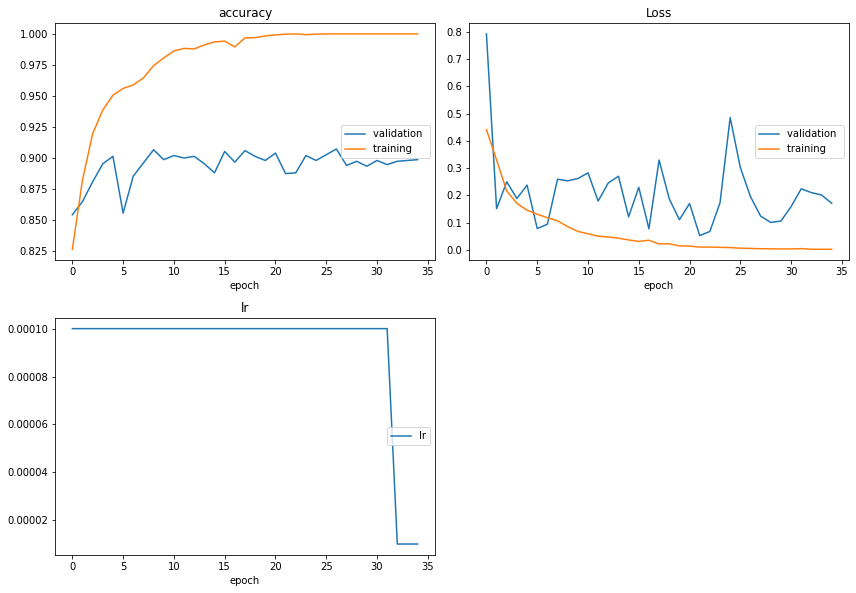

accuracy
	validation       	 (min:    0.854, max:    0.907, cur:    0.899)
	training         	 (min:    0.826, max:    1.000, cur:    1.000)
Loss
	validation       	 (min:    0.053, max:    0.792, cur:    0.171)
	training         	 (min:    0.002, max:    0.441, cur:    0.002)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)

Epoch 00035: val_loss did not improve from 0.05258


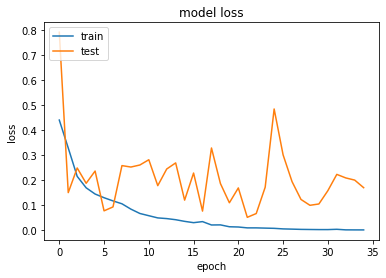

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 35 #10
path="/content/drive/My Drive/covid_runs/vgg_16_balanced_1/"

os.makedirs(path, exist_ok=True)
json_model = final_Model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]


history = final_Model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks
)

final_Model.save_weights(path + "last_run.hdf5")
final_Model.save(path + "model")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [30]:
model_cloud = load_model_from_cloud("/content/drive/My Drive/covid_runs/vgg_16_balanced_1/model.json", "/content/drive/My Drive/covid_runs/vgg_16_balanced_1/last_run.hdf5")
model_cloud.summary()

Model: "VGG16_2_Dense_Layer_Balanced"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56

In [31]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data_balanced,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [0]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [33]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
print(np.round(cm,decimals=2))
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

[[0.84 0.13 0.03]
 [0.   0.9  0.1 ]
 [0.01 0.08 0.9 ]]
              precision    recall  f1-score   support

    Covid-19       0.68      0.84      0.75        31
      Normal       0.94      0.90      0.92       885
   Pneumonia       0.86      0.90      0.88       594

    accuracy                           0.90      1510
   macro avg       0.83      0.88      0.85      1510
weighted avg       0.90      0.90      0.90      1510



Text(0, 0.5, 'Ground truth')

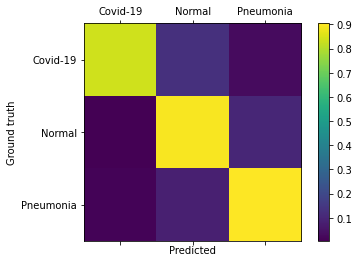

In [34]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Retraining pre-trained model -> VGG16 with Balaced DataSet ! DONE


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import keras
from keras.models import Model
from keras.optimizers import Adam

vgg = keras.applications.VGG16(weights='imagenet',include_top=False, input_shape = (224, 224, 3))

new_model = vgg.output
new_model = Flatten()(new_model)
new_model = Dense(512, activation="relu")(new_model)
new_model = Dense(3, activation="softmax")(new_model)

final_Model = Model(inputs=vgg.input, outputs=new_model, name="VGG16_2_Dense_Layer_Balanced")

opt = Adam(learning_rate=0.0001)
final_Model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

58892288/58889256 [==============================] - 2s 0us/step


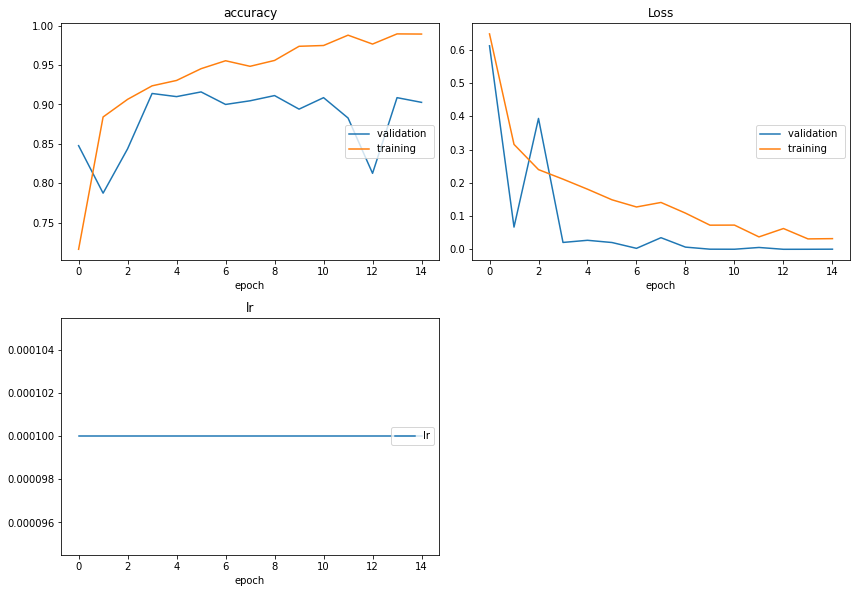

accuracy
	validation       	 (min:    0.787, max:    0.916, cur:    0.903)
	training         	 (min:    0.716, max:    0.990, cur:    0.989)
Loss
	validation       	 (min:    0.000, max:    0.612, cur:    0.000)
	training         	 (min:    0.031, max:    0.648, cur:    0.032)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)

Epoch 00015: val_loss did not improve from 0.00003


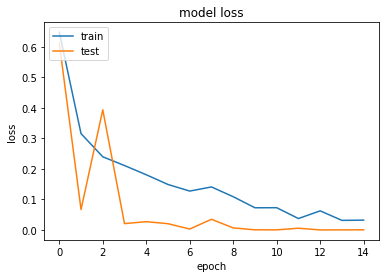

In [22]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 15 #10
path="/content/drive/My Drive/covid_runs/vgg_16_balanced_2/"

os.makedirs(path, exist_ok=True)
json_model = final_Model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]


history = final_Model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks
)

final_Model.save_weights(path + "last_run.hdf5")
final_Model.save(path + "model")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [0]:
model_cloud = load_model_from_cloud("/content/drive/My Drive/covid_runs/vgg_16_balanced_2/model.json", "/content/drive/My Drive/covid_runs/vgg_16_balanced_2/last_run.hdf5")
model_cloud.summary()

In [23]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data_balanced,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [0]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [29]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
print(np.round(cm,decimals=2))
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

[[0.84 0.13 0.03]
 [0.   0.9  0.1 ]
 [0.01 0.08 0.9 ]]
              precision    recall  f1-score   support

    Covid-19       0.68      0.84      0.75        31
      Normal       0.94      0.90      0.92       885
   Pneumonia       0.86      0.90      0.88       594

    accuracy                           0.90      1510
   macro avg       0.83      0.88      0.85      1510
weighted avg       0.90      0.90      0.90      1510



Text(0, 0.5, 'Ground truth')

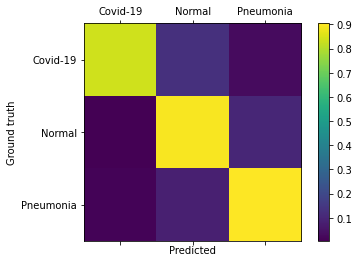

In [26]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## VGG16 from Scratch with Balaced DataSet


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
import keras
from keras.models import Model
from keras.optimizers import Adam

vgg = keras.applications.VGG16(weights=None,include_top=False, input_shape = (224, 224, 3))

new_model = vgg.output
new_model = Flatten()(new_model)
new_model = Dense(512, activation="relu")(new_model)
new_model = Dense(3, activation="softmax")(new_model)

final_Model = Model(inputs=vgg.input, outputs=new_model, name="VGG16_2_Dense_Layer_Balanced_Scratch")

opt = Adam(learning_rate=0.0001)
final_Model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

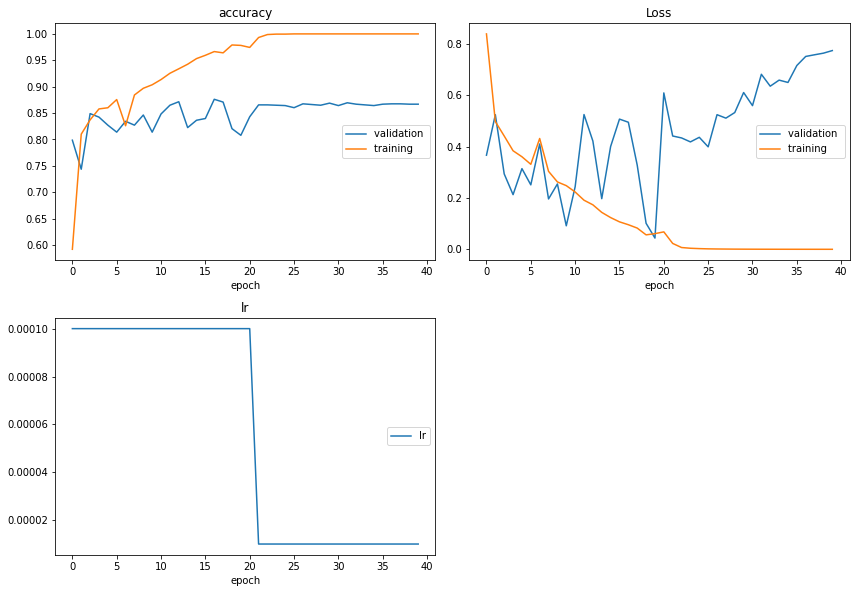

accuracy
	validation       	 (min:    0.744, max:    0.876, cur:    0.867)
	training         	 (min:    0.592, max:    1.000, cur:    1.000)
Loss
	validation       	 (min:    0.044, max:    0.774, cur:    0.774)
	training         	 (min:    0.000, max:    0.839, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)

Epoch 00040: val_loss did not improve from 0.04384


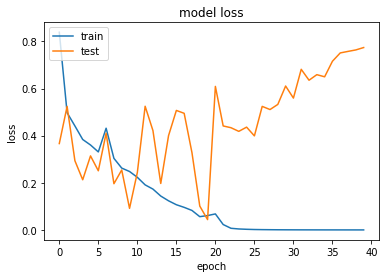

In [44]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 40 #10
path="/content/drive/My Drive/covid_runs/vgg_16_balanced_3/"

os.makedirs(path, exist_ok=True)
json_model = final_Model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]


history = final_Model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks
)

final_Model.save_weights(path + "last_run.hdf5")
final_Model.save(path + "model")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [0]:
model_cloud = load_model_from_cloud("/content/drive/My Drive/covid_runs/vgg_16_balanced_3/model.json", "/content/drive/My Drive/covid_runs/vgg_16_balanced_3/last_run.hdf5")
model_cloud.summary()

In [45]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data_balanced,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [0]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [47]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
print(np.round(cm,decimals=2))
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

[[0.   0.26 0.74]
 [0.   0.91 0.09]
 [0.   0.09 0.91]]
              precision    recall  f1-score   support

    Covid-19       0.00      0.00      0.00        31
      Normal       0.93      0.91      0.92       885
   Pneumonia       0.84      0.91      0.87       594

    accuracy                           0.89      1510
   macro avg       0.59      0.61      0.60      1510
weighted avg       0.87      0.89      0.88      1510



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Ground truth')

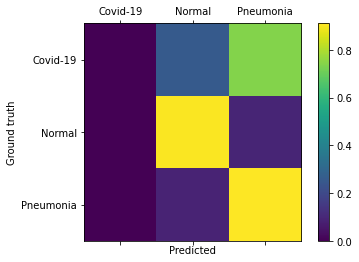

In [48]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')